Arquivos carregados com sucesso!
Lin: (15, 15) Scikit: (20, 12) BGD: (20, 14) SGD: (20, 14)


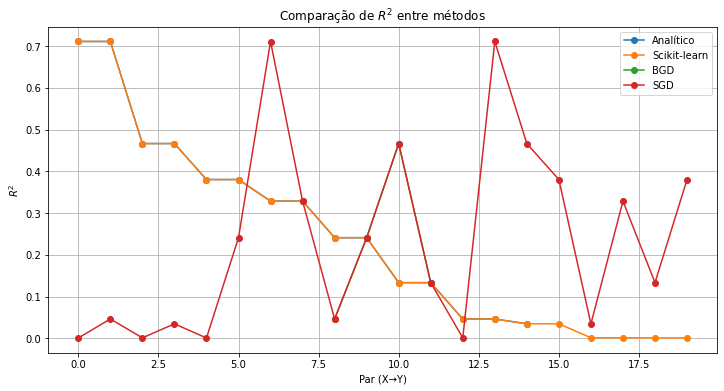

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# caminho base
DATA_PATH = Path.cwd().joinpath("Exercicio01/tabela")

# carregar cada resultado
df_lin      = pd.read_csv(DATA_PATH / "results_linear.csv")
df_skl      = pd.read_csv(DATA_PATH / "results_linear_scikit.csv")
df_bgd      = pd.read_csv(DATA_PATH / "results_BGD.csv")
df_sgd      = pd.read_csv(DATA_PATH / "results_SGD.csv")

print("Arquivos carregados com sucesso!")
print("Lin:", df_lin.shape, "Scikit:", df_skl.shape,
      "BGD:", df_bgd.shape, "SGD:", df_sgd.shape)

# plot
plt.figure(figsize=(12,6))
plt.plot(df_lin["R2"], "o-", label="Analítico")
plt.plot(df_skl["R2"], "o-", label="Scikit-learn")
plt.plot(df_bgd["R2"], "o-", label="BGD")
plt.plot(df_sgd["R2"], "o-", label="SGD")
plt.ylabel("$R^2$")
plt.xlabel("Par (X→Y)")
plt.title("Comparação de $R^2$ entre métodos")
plt.legend()
plt.grid(True)
plt.show()

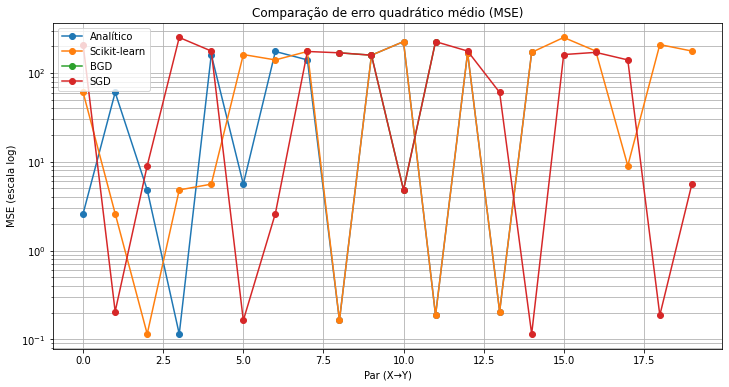

In [13]:
plt.figure(figsize=(12,6))
plt.semilogy(df_lin["MSE"], "o-", label="Analítico")
plt.semilogy(df_skl["MSE"], "o-", label="Scikit-learn")
plt.semilogy(df_bgd["MSE"], "o-", label="BGD")
plt.semilogy(df_sgd["MSE"], "o-", label="SGD")
plt.ylabel("MSE (escala log)")
plt.xlabel("Par (X→Y)")
plt.title("Comparação de erro quadrático médio (MSE)")
plt.legend()
plt.grid(True, which="both")
plt.show()

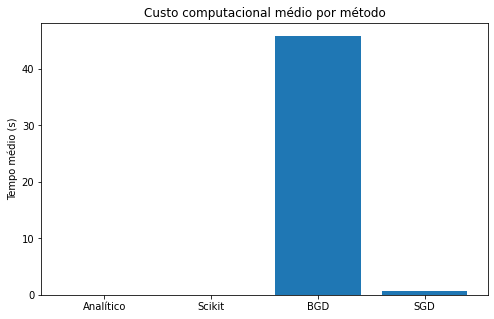

In [14]:
plt.figure(figsize=(8,5))
plt.bar(["Analítico","Scikit","BGD","SGD"],
        [df_lin["wall_s"].mean(),
         df_skl["wall_s"].mean(),
         df_bgd["wall_s"].mean(),
         df_sgd["wall_s"].mean()])
plt.ylabel("Tempo médio (s)")
plt.title("Custo computacional médio por método")
plt.show()

In [35]:
pair_idx = 1  # escolha um par

plt.figure(figsize=(10,5))
plt.plot(eval(df_bgd["history"].iloc[pair_idx]), label="BGD")
plt.plot(eval(df_sgd["history"].iloc[pair_idx]), label="SGD")
plt.ylabel("MSE")
plt.xlabel("Época")
plt.title("Curvas de convergência (BGD vs SGD)")
plt.legend()
plt.show()

KeyError: 'history'

<Figure size 720x360 with 0 Axes>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pick_col(df, candidates, default=np.nan):
    """Retorna a 1ª coluna existente dentre 'candidates'; senão uma série com default."""
    for c in candidates:
        if c in df.columns:
            return df[c]
    return pd.Series([default] * len(df), index=df.index)

def standardize_results(df, method_name):
    """
    Cria um DataFrame padronizado com as principais métricas,
    preenchendo com NaN quando colunas não existirem.
    """
    out = pd.DataFrame({
        "method":  method_name,
        "pair":    pick_col(df, ["pair", "x"], default=np.arange(len(df))),
        "R2":      pick_col(df, ["R2", "r2"]),
        "MSE":     pick_col(df, ["MSE", "mse"]),
        "iters":   pick_col(df, ["iters", "n_iters", "epochs"]),
        "wall_s":  pick_col(df, ["wall_s", "wall", "time_s", "elapsed_s", "time"]),
        # Campos que alguns CSVs possuem
        "SSE":     pick_col(df, ["SSE", "sse"]),
        "SSR":     pick_col(df, ["SSR", "ssr"]),
        "SST":     pick_col(df, ["SST", "sst"]),
        "N":       pick_col(df, ["N", "n"])
    })
    return out

# Unifica tudo
res_all = pd.concat([
    standardize_results(df_lin, "Analítico"),
    standardize_results(df_skl, "Scikit"),
    standardize_results(df_bgd, "BGD"),
    standardize_results(df_sgd, "SGD"),
], ignore_index=True)

# Resumo por método (média, ignorando NaN)
summary = res_all.groupby("method", as_index=False).agg({
    "R2": "mean", "MSE": "mean", "iters": "mean", "wall_s": "mean"
})
summary

,method,R2,MSE,iters,wall_s
0,Analítico,0.309917,84.755005,NaN,0.002471
1,BGD,0.221788,139.123346,200000.00,45.865358
2,SGD,0.234333,104.605994,393.55,0.744783
3,Scikit,0.234403,104.597511,NaN,0.000958


# MSE médio por método

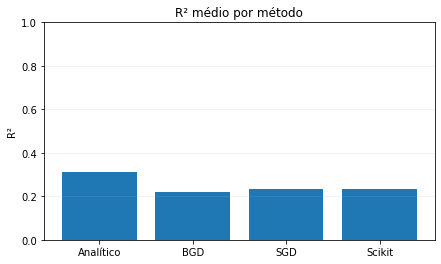

In [30]:
plt.figure(figsize=(7,4))
plt.bar(summary["method"], summary["R2"])
plt.title("R² médio por método")
plt.ylabel("R²")
plt.ylim(0, 1)             # opcional
plt.grid(axis="y", alpha=.2)
plt.show()

# R² médio por método

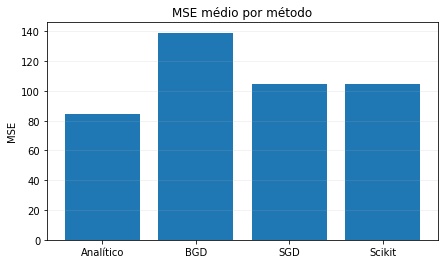

In [29]:
plt.figure(figsize=(7,4))
plt.bar(summary["method"], summary["MSE"])
plt.title("MSE médio por método")
plt.ylabel("MSE")
plt.grid(axis="y", alpha=.2)
plt.show()

# Iterações médias (para BGD/SGD)

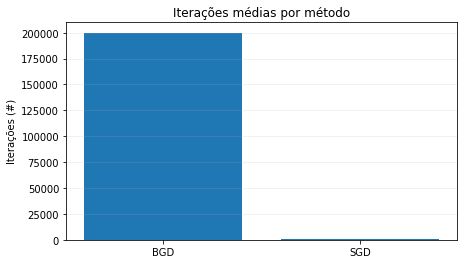

In [28]:
plt.figure(figsize=(7,4))
plt.bar(summary["method"], summary["iters"])
plt.title("Iterações médias por método")
plt.ylabel("Iterações (#)")
plt.grid(axis="y", alpha=.2)
plt.show()


# Tempo médio (s)

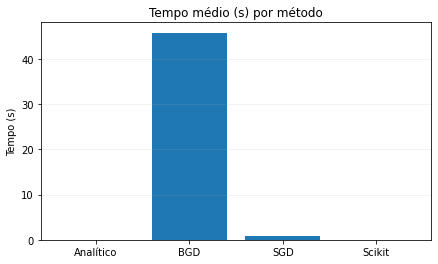

In [27]:
if summary["wall_s"].notna().any():
    plt.figure(figsize=(7,4))
    plt.bar(summary["method"], summary["wall_s"])
    plt.title("Tempo médio (s) por método")
    plt.ylabel("Tempo (s)")
    plt.grid(axis="y", alpha=.2)
    plt.show()
else:
    print("Nenhum dos CSVs possui coluna de tempo (wall_s/time).")

# ranking dos pares 

In [26]:
# Melhores pares por R² em cada método
top_by_method = (
    res_all.sort_values(["method", "R2"], ascending=[True, False])
          .groupby("method")
          .head(5)[["method","pair","R2","MSE","iters","wall_s"]]
)
top_by_method

,method,pair,R2,MSE,iters,wall_s
0,Analítico,Height,0.710977,2.609349,NaN,0.000762
1,Analítico,Shoe number,0.710977,60.299015,NaN,0.000707
2,Analítico,Sex,0.466478,4.816732,NaN,0.000810
3,Analítico,Shoe number,0.466478,0.115155,NaN,0.000718
4,Analítico,Shoe number,0.380260,160.916183,NaN,0.000709
45,BGD,Sex,0.466478,4.816732,200000.0,58.527542
44,BGD,Sex,0.241039,158.342453,200000.0,45.405010
46,BGD,Sex,0.133350,225.026779,200000.0,46.654880
43,BGD,Sex,0.046283,168.307419,200000.0,45.732960
35,BGD,Age,NaN,NaN,200000.0,45.265610
